In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
from datasets import Dataset

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/fine_tuning/amazon_product_details.csv'
df = pd.read_csv(file_path)

display(df.head(3))

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [ ]:
df['category'] = df['category'].apply(lambda x: x.split('|')[-1])
df['category']

,category
0,USBCables
1,USBCables
2,USBCables
3,USBCables
4,USBCables
...,...
1460,WaterPurifierAccessories
1461,Rice&PastaCookers
1462,HeatConvectors
1463,ExhaustFans


In [ ]:
products = df[['category', 'product_name']]
description = df[['category', 'about_product']]

products = products.rename(columns={'product_name': 'text'})
description = description.rename(columns={'about_product': 'text'})

products['task_type'] = 'Product Name'
description['task_type'] = 'Product Description'


In [ ]:
products.head(3)

,category,text,task_type
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name


In [ ]:
description.head(3)

,category,text,task_type
0,USBCables,High Compatibility : Compatible With iPhone 12...,Product Description
1,USBCables,"Compatible with all Type C enabled devices, be...",Product Description
2,USBCables,【 Fast Charger& Data Sync】-With built-in safet...,Product Description


In [ ]:
df = pd.concat([products, description], ignore_index=True)

In [ ]:
df.head(3)

,category,text,task_type
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name


In [ ]:
df.shape

(2930, 3)

In [ ]:
dataset = Dataset.from_pandas(df)
dataset = dataset.shuffle(seed=0)
dataset = dataset.train_test_split(test_size=0.25)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 2197
    })
    test: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 733
    })
})

In [ ]:
dataset['train'][0]

{'category': 'Monitors',
 'text': '24 inch Samsung Monitor - 1,920 x 1,080 Resolution IPS Panel Monitor|3-sided borderless display for All-expansive view|Fluid pictures with 75hz refresh rate | 5 ms response time | 250cd/m2 Brightness (Typical)|Aspect Ratio: 16:9 | 178° Horizontal and Vertical Viewing Angle|FreeSync and Game Mode to adjust any game and fill screen|Eye Saver Mode and Flicker free to reduce eye strain|Connectivity : D-Sub Port, HDMI|3 Years Warranty on Product From Manufacturer',
 'task_type': 'Product Description'}

In [ ]:
dataset['test'][0]

{'category': 'InductionCooktop',
 'text': 'Induction cooktop with press button control and High quality crystal glass|Certified by Bureau of Indian Standards (IS 302-2-6 : 2009)|Induction cooktop with press button control and High quality crystal glass|Certified by Bureau of Indian Standards (IS 302-2-6 : 2009)|Super wide voltage adaptability and with multifunctions|Auto shutoff safety protection and Overheat protection|High quality coils|2 Year Warranty (1 Year standard warranty + 1 Year additional warranty on free registration. Warranty Registration should be done within 30 days from the date of purchase.)',
 'task_type': 'Product Description'}

In [ ]:
# 1.5 times of total words
products['text_tokens'] = products['text'].apply(lambda x: len(x.split())*1.5)
description['text_tokens'] = description['text'].apply(lambda x: len(x.split())*1.5)


In [ ]:
products['text_tokens']

,text_tokens
0,48.0
1,46.5
2,40.5
3,48.0
4,30.0
...,...
1460,52.5
1461,13.5
1462,18.0
1463,13.5


<Axes: >

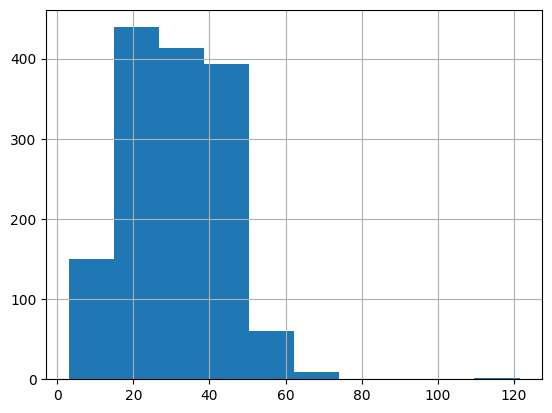

In [ ]:
products['text_tokens'].hist()

In [ ]:
description['text_tokens']

,text_tokens
0,198.0
1,139.5
2,252.0
3,163.5
4,142.5
...,...
1460,106.5
1461,9.0
1462,61.5
1463,138.0


<Axes: >

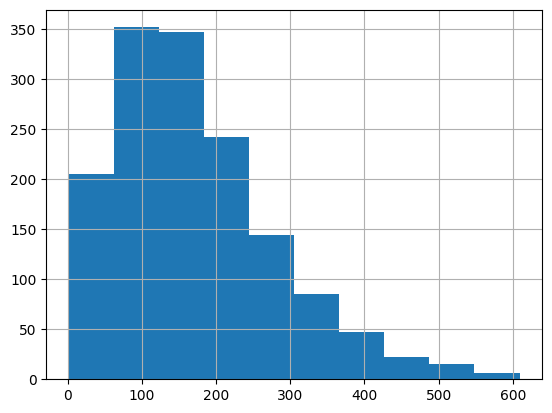

In [ ]:
description['text_tokens'].hist()

In [ ]:
def formatting_func(example):
    text = f"""
            Given the product category, you need to generate a '{example['task_type']}'.
            ### Category: {example['category']}\n ### {example['task_type']}: {example['text']}

            """
    return text

In [ ]:
dataset['train'][0]

{'category': 'Monitors',
 'text': '24 inch Samsung Monitor - 1,920 x 1,080 Resolution IPS Panel Monitor|3-sided borderless display for All-expansive view|Fluid pictures with 75hz refresh rate | 5 ms response time | 250cd/m2 Brightness (Typical)|Aspect Ratio: 16:9 | 178° Horizontal and Vertical Viewing Angle|FreeSync and Game Mode to adjust any game and fill screen|Eye Saver Mode and Flicker free to reduce eye strain|Connectivity : D-Sub Port, HDMI|3 Years Warranty on Product From Manufacturer',
 'task_type': 'Product Description'}

In [ ]:
print(formatting_func(dataset['train'][0]))


            Given the product category, you need to generate a 'Product Description'.
            ### Category: Monitors
 ### Product Description: 24 inch Samsung Monitor - 1,920 x 1,080 Resolution IPS Panel Monitor|3-sided borderless display for All-expansive view|Fluid pictures with 75hz refresh rate | 5 ms response time | 250cd/m2 Brightness (Typical)|Aspect Ratio: 16:9 | 178° Horizontal and Vertical Viewing Angle|FreeSync and Game Mode to adjust any game and fill screen|Eye Saver Mode and Flicker free to reduce eye strain|Connectivity : D-Sub Port, HDMI|3 Years Warranty on Product From Manufacturer

            


###**Load Model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

base_model_id = "/content/drive/MyDrive/HuggingFace_Model/Qwen1.5-0.5B-Chat"

import os
print("Files in folder:")
for file in sorted(os.listdir(base_model_id)):
    print("  ", file)

model = AutoModelForCausalLM.from_pretrained(base_model_id, torch_dtype=torch.float16)
model

Files in folder:
   config.json
   generation_config.json
   merges.txt
   model.safetensors
   special_tokens_map.json
   tokenizer.json
   tokenizer_config.json
   vocab.json


`torch_dtype` is deprecated! Use `dtype` instead!


Loading weights:   0%|          | 0/291 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.embed_tokens.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1024)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (o_proj): Linear(in_features=1024, out_features=1024, bias=False)
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=1024, out_features=2816, bias=False)
          (up_proj): Linear(in_features=1024, out_features=2816, bias=False)
          (down_proj): Linear(in_features=2816, out_features=1024, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): Qwen2RMSNorm((1024,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((1024,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((1024,), eps=1e-06)
    (rot

###**Load Tokenizer**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    use_fast=True
)

# tokenizer.pad_token = tokenizer.eos_token

# If the tokenizer has no pad token (common in decoder-only LMs)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

**Add tokenize Function**

In [ ]:
max_length = 400

def tokenize(prompt):
  result = tokenizer(
      formatting_func(prompt),
      truncation = True,
      max_length=max_length,
      padding = "max_length"
  )

  result['labels'] = result['input_ids'].copy()

  return result

In [ ]:
print(tokenize(dataset['train'][0]))

{'input_ids': [151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 1

In [ ]:
dataset = dataset.map(tokenize)

Map:   0%|          | 0/2197 [00:00<?, ? examples/s]

Map:   0%|          | 0/733 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2197
    })
    test: Dataset({
        features: ['category', 'text', 'task_type', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 733
    })
})

In [ ]:
eval_prompt = """
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
"""

In [ ]:
# tokenize -> generate -> decode

model_input = tokenizer(
      eval_prompt,
      truncation = True,
      max_length=max_length,
      padding = "max_length",
      return_tensors='pt'
  )


**Simple Testing**

In [ ]:
model.eval()

model_input = {k: v.to(model.device) for k, v in model_input.items()}

with torch.no_grad():
    output = model.generate(
        **model_input,
        max_new_tokens=256,
        repetition_penalty=1.15
    )
    result = tokenizer.decode(output[0], skip_special_tokens=True)
    print(result)


Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:


：
We deliver the following product description for the category of battery changers:

This product comes with the following description for the categories of batteries CH chargeers:

Please find the following product description for the category of battery_champs:

This product provides an exceptional solution for the products aimed at the customers who have the needs of the battery-ch chargers in the battery-ch charger category. We provide a comprehensive range of options that will help our clients achieve their objectives and meet their requirements. This product offers the following specifications for the battery_champ category:

This product features a wide selection of products that are designed to ensure that the battery-ch chargeers meet the customers' needs. These products are packed with the necessary components and that will make it easy for our 

##**Apply Lora and Train**

In [ ]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        print(name)

model.layers.0.self_attn.q_proj
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.o_proj
model.layers.0.mlp.gate_proj
model.layers.0.mlp.up_proj
model.layers.0.mlp.down_proj
model.layers.1.self_attn.q_proj
model.layers.1.self_attn.k_proj
model.layers.1.self_attn.v_proj
model.layers.1.self_attn.o_proj
model.layers.1.mlp.gate_proj
model.layers.1.mlp.up_proj
model.layers.1.mlp.down_proj
model.layers.2.self_attn.q_proj
model.layers.2.self_attn.k_proj
model.layers.2.self_attn.v_proj
model.layers.2.self_attn.o_proj
model.layers.2.mlp.gate_proj
model.layers.2.mlp.up_proj
model.layers.2.mlp.down_proj
model.layers.3.self_attn.q_proj
model.layers.3.self_attn.k_proj
model.layers.3.self_attn.v_proj
model.layers.3.self_attn.o_proj
model.layers.3.mlp.gate_proj
model.layers.3.mlp.up_proj
model.layers.3.mlp.down_proj
model.layers.4.self_attn.q_proj
model.layers.4.self_attn.k_proj
model.layers.4.self_attn.v_proj
model.layers.4.self_attn.o_proj
model.layers.4.mlp.g

In [ ]:
from peft import LoraConfig, get_peft_model

target_modules = ["q_proj", "k_proj", "v_proj", "o_proj"]

config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)

model.print_trainable_parameters()

trainable params: 1,572,864 || all params: 621,143,040 || trainable%: 0.2532


In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )


print_trainable_parameters(model)

trainable params: 1572864 || all params: 621143040 || trainable%: 0.2532209006157422


# **Model Training**



In [ ]:
from accelerate import Accelerator

accelerator = Accelerator(gradient_accumulation_steps=1)

model = accelerator.prepare_model(model)

In [ ]:
# Trainer, Training Arguments, DataCollator

from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling
from datetime import datetime

project = "Qwen1.5-chat-finetune"
run_name = 'train-dir'
output_dir = "/content/drive/MyDrive/Colab Notebooks/fine_tuning/" + run_name


args=TrainingArguments(
        dataloader_pin_memory=False,
        output_dir=output_dir,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        max_steps=500,
        learning_rate=2.5e-5,
        optim="paged_adamw_8bit",
        logging_steps=25,
        logging_dir=output_dir + "/logs",
        save_strategy="steps",
        save_steps=25,
        eval_strategy="steps",
        eval_steps=25,
        do_eval=True,
    )

`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


In [ ]:
trainer = Trainer(
    model=model,
    args = args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test'],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

In [ ]:
model.config.use_cache = False
trainer.train()

Step,Training Loss,Validation Loss
25,6.120085,5.177170
50,4.930987,4.624515
75,4.563609,4.241735
100,4.196192,4.009139
125,3.834862,3.860098
150,3.847308,3.760507
175,3.684467,3.693300
200,3.713914,3.639653
225,3.609358,3.600802
250,3.507515,3.571681


TrainOutput(global_step=500, training_loss=3.8431590423583986, metrics={'train_runtime': 677.0055, 'train_samples_per_second': 1.477, 'train_steps_per_second': 0.739, 'total_flos': 1117345382400000.0, 'train_loss': 3.8431590423583986, 'epoch': 0.4549590536851683})

**Save LoRA adapter weights**

In [ ]:
# Save LoRA adapter weights
lora_output_dir = "/content/drive/MyDrive/Colab Notebooks/fine_tuning/qwen-lora-adapter"
model.save_pretrained(lora_output_dir)
tokenizer.save_pretrained(lora_output_dir)
print("✅ LoRA adapter saved!")

✅ LoRA adapter saved!


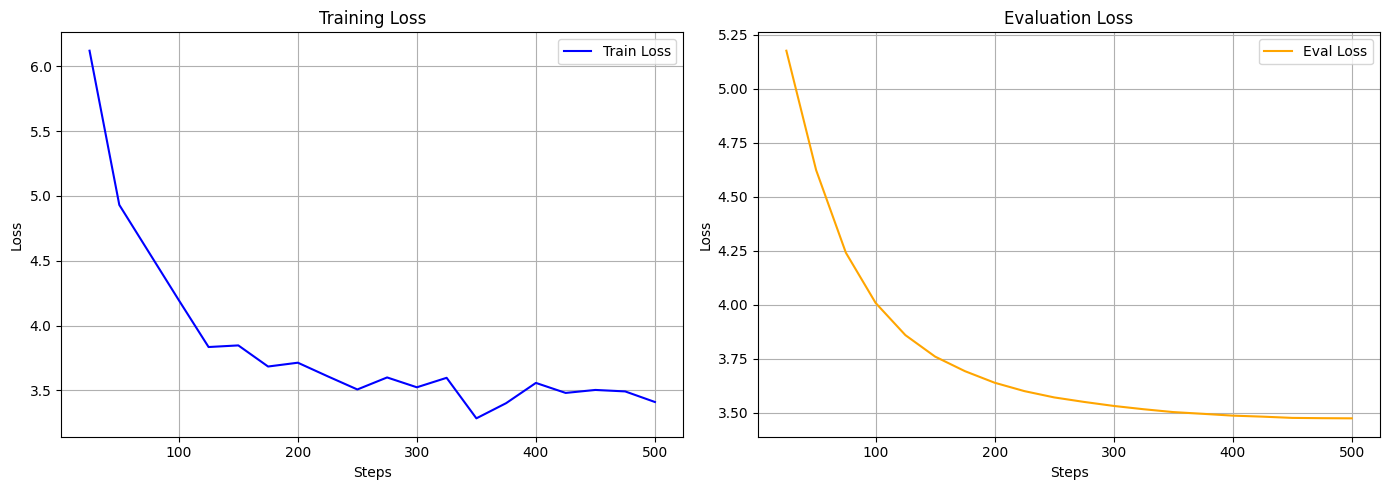

In [ ]:
import matplotlib.pyplot as plt

# Extract logs from trainer
logs = [log for log in trainer.state.log_history if "loss" in log]
eval_logs = [log for log in trainer.state.log_history if "eval_loss" in log]

train_steps = [log["step"] for log in logs]
train_loss = [log["loss"] for log in logs]

eval_steps = [log["step"] for log in eval_logs]
eval_loss = [log["eval_loss"] for log in eval_logs]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(train_steps, train_loss, label="Train Loss", color="blue")
ax[0].set_title("Training Loss")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(eval_steps, eval_loss, label="Eval Loss", color="orange")
ax[1].set_title("Evaluation Loss")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("Loss")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Re-enable cache for inference
model.config.use_cache = True
model.eval()

test_prompts = [
    {
        "task_type": "Product Name",
        "category": "Smartphones"
    },
    {
        "task_type": "Product Description",
        "category": "WirelessEarbuds"
    },
    {
        "task_type": "Product Description",
        "category": "BatteryChargers"
    },
    {
        "task_type": "Product Name",
        "category": "LaptopAccessories"
    },
]

for prompt_data in test_prompts:
    eval_prompt = f"""Given the product category, you need to generate a '{prompt_data['task_type']}'.
### Category: {prompt_data['category']}
### {prompt_data['task_type']}:"""

    model_input = tokenizer(
        eval_prompt,
        return_tensors='pt',
        truncation=True,
        max_length=400,
        padding="max_length"
    )
    model_input = {k: v.to(model.device) for k, v in model_input.items()}

    with torch.no_grad():
        output = model.generate(
            **model_input,
            max_new_tokens=200,
            repetition_penalty=1.15,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )
    result = tokenizer.decode(output[0], skip_special_tokens=True)
    print("=" * 70)
    print(f"📌 Task: {prompt_data['task_type']} | Category: {prompt_data['category']}")
    print(result)
    print()

📌 Task: Product Name | Category: Smartphones
Given the product category, you need to generate a 'Product Name'.
### Category: Smartphones
### Product Name:
Smartphones with Face ID

📌 Task: Product Description | Category: WirelessEarbuds
Given the product category, you need to generate a 'Product Description'.
### Category: WirelessEarbuds
### Product Description:
*An earbud with built-in mic for hands-free audio. Perfect for listening to music or taking calls while walking or driving.

📌 Task: Product Description | Category: BatteryChargers
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
* **Type:** 3000mAh

* **Max Charge:** Up to 20 hours of continuous use per charge

* **Capacity:** 165 Wh

* **Output Voltage:** 4.7V - 9.5V

* **Power Management System:** High performance charging and discharge

* **Wireless Charging:** Yes, supports wireless charging for iPhone 8/8 Plus & iPad Pro

📌 Task: Product Nam

In [ ]:
import numpy as np
from tqdm import tqdm

# Pick a sample from the test set
num_samples = 50
samples = dataset['test'].select(range(num_samples))

references = []
predictions = []

for sample in tqdm(samples):
    eval_prompt = f"""Given the product category, you need to generate a '{sample['task_type']}'.
### Category: {sample['category']}
### {sample['task_type']}:"""

    model_input = tokenizer(
        eval_prompt,
        return_tensors='pt',
        truncation=True,
        max_length=400,
        padding="max_length"
    )
    model_input = {k: v.to(model.device) for k, v in model_input.items()}

    with torch.no_grad():
        output = model.generate(
            **model_input,
            max_new_tokens=150,
            repetition_penalty=1.15,
        )

    pred = tokenizer.decode(output[0], skip_special_tokens=True)
    # Extract only the generated part (after the prompt)
    pred_text = pred[len(eval_prompt):].strip()

    predictions.append(pred_text)
    references.append(sample['text'])

100%|██████████| 50/50 [02:25<00:00,  2.91s/it]


In [ ]:
# Install evaluation metrics
!pip install rouge-score nltk

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

for ref, pred in zip(references, predictions):
    scores = scorer.score(ref, pred)
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

print(f"ROUGE-1: {np.mean(rouge1_scores):.4f}")
print(f"ROUGE-2: {np.mean(rouge2_scores):.4f}")
print(f"ROUGE-L: {np.mean(rougeL_scores):.4f}")

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=d3703278ef421aab437e9019ff587d11377b6e2583338bfef7dfbf862a267dcd
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score
ROUGE-1: 0.1471
ROUGE-2: 0.0176
ROUGE-L: 0.1013


In [ ]:
comparison_df = pd.DataFrame({
    "Category": [samples[i]['category'] for i in range(min(10, num_samples))],
    "Task": [samples[i]['task_type'] for i in range(min(10, num_samples))],
    "Ground Truth": references[:10],
    "Prediction": predictions[:10],
})

comparison_df.style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'})

,Category,Task,Ground Truth,Prediction
0,InductionCooktop,Product Description,Induction cooktop with press button control and High quality crystal glass|Certified by Bureau of Indian Standards (IS 302-2-6 : 2009)|Induction cooktop with press button control and High quality crystal glass|Certified by Bureau of Indian Standards (IS 302-2-6 : 2009)|Super wide voltage adaptability and with multifunctions|Auto shutoff safety protection and Overheat protection|High quality coils|2 Year Warranty (1 Year standard warranty + 1 Year additional warranty on free registration. Warranty Registration should be done within 30 days from the date of purchase.),"induction cooker designed for efficient and easy cleaning. Features a sleek design with stainless steel construction that allows for quick assembly. The cooktop features two built-in burners, one for traditional-style cooking methods such as roasting or frying, while the other has a versatile option for grilling and baking. The cooktop also includes a temperature control system, allowing users to set different temperatures without having to manually adjust the settings. Additionally, the cooktop is equipped with an electric filter and auto shut off feature to prevent any damage caused by bacteria or odors."
1,On-Ear,Product Name,"ZEBRONICS Zeb-Thunder Bluetooth Wireless Over Ear Headphone FM, mSD, 9 hrs Playback with Mic (Black)",Onearear Pro 2
2,MixerGrinders,Product Name,"Bajaj Rex 500W Mixer Grinder with Nutri-Pro Feature, 3 Jars, White",Bass M-650 Mixing Machine
3,WallChargers,Product Description,"Charging Cable Not Included. Compatible With All Standard Usb Type-C Cables Such As Usb-C To Usb-C, Usb-C To Lightning And Etc. For Optimum Results, Please Use With Authentic Samsung Cables Which Can Be Purchased Separately|Enjoy The Flexibility Enabled By Usb-C Compatible Cables. You Can Alternate The Types Of Cables To Charge A Variety Of Mobile Devices That You Own. Just Plug In A Cable ?? There'S No Need To Change The Adapter Plugged Into Your Wall Outlet|Enjoy The Flexibility Of The Usb Type-C; Super Fast Charging To Stay Ready|Give Your Mobile Devices The Powerful And Safe Charging Support They Deserve. This Wall Charger Provides Super Fast Charging With Usb-C Pd 3.0 Pps At Up To Max 25W For Capable Devices. So When You Do Run Low, It'S Not For Long|Included Components: Wall Charger, User Manual; Power Source Type: Corded Electric","An innovative wall charger designed with high efficiency and convenient design. Its sleek style makes it easy for any device connected via USB port. It provides quick charging speed that can charge devices within seconds. This wall charger is also compact size, making it perfect for your home or office use."
4,CameraPrivacyCovers,Product Description,"Protect Privacy Security: Focusing on network security, now we can easily and effectively protect personal and family privacy security, just gently slide the slide and close the camera, you can stop the intrusion of hackers.|Ultra Thin And Durable: The new ultra-thin design, with a thickness of only 0.022 inches, is made of flexible ABS material and is not fragile. Will not affect the closing of the laptops and scratch the laptops.|Easy to install: Strong adhesive makes the cover not fall, keep the screen clean and free of stains during installation, tear off the adhesive tape on the back, align it with our camera, and press hard for 10 seconds to work.|Compatible with: Compatible for all Laptops, Standalone Web Camera, Desktop with Webcamera on Panel, PC, Smartphone, Tabs, Mobile Front camera of Phones etc.|What you get: 3 pack of Gizga Essentials black WebCam/ Web Camera slide covers.",**SmartCamera Privacy Covers for Camera and Video Phone:** Protect your camera from being viewed by unauthorized individuals during video calls or phone calls. This privacy covers keeps your camera in view but prevents anyone from taking pictures of it.
5,Lapdesks,Product Description,"HB Plus Laptop Ergonomic Stand Or Laptop S

# Megre Lora with base model

In [ ]:
from peft import PeftModel

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16
)

merged_model = PeftModel.from_pretrained(base_model, lora_output_dir)
merged_model = merged_model.merge_and_unload()


# merged_model.save_pretrained("qwen-merged")

Loading weights:   0%|          | 0/291 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.embed_tokens.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


In [ ]:
merged_save_path = "/content/drive/MyDrive/Colab Notebooks/fine_tuning/qwen-merged"
merged_model.save_pretrained(merged_save_path)
tokenizer.save_pretrained(merged_save_path)
print("✅ Merged model saved!")

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Merged model saved!


In [ ]:
import os

print("📁 LoRA Adapter files:")
for f in sorted(os.listdir(lora_output_dir)):
    print(f"  {f}")

print("\n📁 Merged Model files:")
for f in sorted(os.listdir(merged_save_path)):
    print(f"  {f}")

📁 LoRA Adapter files:
  README.md
  adapter_config.json
  adapter_model.safetensors
  chat_template.jinja
  tokenizer.json
  tokenizer_config.json

📁 Merged Model files:
  chat_template.jinja
  config.json
  generation_config.json
  model.safetensors
  tokenizer.json
  tokenizer_config.json


# **Test fine-tuned model**

In [ ]:
merged_model.config.use_cache = True
merged_model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
merged_model = merged_model.to(device)

eval_prompt = """Given the product category, you need to generate a 'Product Name'.
### Category: Smartphones
### Product Name:"""

model_input = tokenizer(
    eval_prompt,
    return_tensors='pt',
    truncation=True,
    max_length=400,
    padding="max_length"
)
model_input = {k: v.to(device) for k, v in model_input.items()}

with torch.no_grad():
    output = merged_model.generate(
        **model_input,
        max_new_tokens=200,
        repetition_penalty=1.15,
        temperature=0.7,
        top_p=0.9,
        do_sample=True
    )

result = tokenizer.decode(output[0], skip_special_tokens=True)
print(result)

Given the product category, you need to generate a 'Product Name'.
### Category: Smartphones
### Product Name:
Smartphone 7 (Android)


In [ ]:
merged_model.config.use_cache = True
merged_model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
merged_model = merged_model.to(device)

test_prompts = [
    {
        "task_type": "Product Name",
        "category": "Smartphones"
    },
    {
        "task_type": "Product Description",
        "category": "WirelessEarbuds"
    },
    {
        "task_type": "Product Description",
        "category": "BatteryChargers"
    },
    {
        "task_type": "Product Name",
        "category": "LaptopAccessories"
    },
]

for prompt_data in test_prompts:
    eval_prompt = f"""Given the product category, you need to generate a '{prompt_data['task_type']}'.
### Category: {prompt_data['category']}
### {prompt_data['task_type']}:"""

    model_input = tokenizer(
        eval_prompt,
        return_tensors='pt',
        truncation=True,
        max_length=400,
        padding="max_length"
    )
    # ← هنا بنستخدم merged_model.device بدل model.device
    model_input = {k: v.to(merged_model.device) for k, v in model_input.items()}

    with torch.no_grad():
        output = merged_model.generate(     # ← merged_model بدل model
            **model_input,
            max_new_tokens=200,
            repetition_penalty=1.15,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )
    result = tokenizer.decode(output[0], skip_special_tokens=True)
    print("=" * 70)
    print(f"📌 Task: {prompt_data['task_type']} | Category: {prompt_data['category']}")
    print(result)
    print()

📌 Task: Product Name | Category: Smartphones
Given the product category, you need to generate a 'Product Name'.
### Category: Smartphones
### Product Name:
Smartisan T20

📌 Task: Product Description | Category: WirelessEarbuds
Given the product category, you need to generate a 'Product Description'.
### Category: WirelessEarbuds
### Product Description:
An earbud that allows users to easily turn on and off their audio sources. The design features a sleek and lightweight material construction for maximum comfort and durability. With customizable耳塞 options available, users can create a unique style for themselves. Additionally, the earbud includes advanced noise-cancelling technology that reduces background噪音 while still providing high-quality sound.

📌 Task: Product Description | Category: BatteryChargers
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
A high-quality battery charger that provides an efficie